In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\tlynx\Downloads\CrimeStats\Nigeria Covid19.csv', encoding = 'latin1')
df

,ID,DATE,States,Contaminates,Death,Recover
0,1,2/27/2020,Abia,0.0,0.0,0.0
1,2,2/27/2020,Adamawa,0.0,0.0,0.0
2,3,2/27/2020,Akwa Ibom,0.0,0.0,0.0
3,4,2/27/2020,Anambra,0.0,0.0,0.0
4,5,2/27/2020,Bauchi,0.0,0.0,0.0
...,...,...,...,...,...,...
26861,26862,2/2/2022,Sokoto,0.0,0.0,0.0
26862,26863,2/2/2022,Taraba,0.0,0.0,0.0
26863,26864,2/2/2022,Yobe,0.0,0.0,0.0
26864,26865,2/2/2022,Zamfara,0.0,0.0,0.0


Data Cleaning

In [3]:
df.isnull().sum()

ID                0
DATE              0
States            0
Contaminates     64
Death           403
Recover         586
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

ID                int64
DATE             object
States           object
Contaminates    float64
Death           float64
Recover         float64
dtype: object

In [6]:
#Fill null values
df['Contaminates'] = df['Contaminates'].fillna(np.nan)
df['Death'] = df['Death'].fillna(np.nan)
df['Recover'] = df['Recover'].fillna(np.nan)

In [7]:
#Remove white spaces

df['States'] = df['States'].str.strip()

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'], errors = 'coerce')

In [9]:
df.isnull().sum()

ID                0
DATE              0
States            0
Contaminates     64
Death           403
Recover         586
dtype: int64

Analysis

1. At what month in 2020 did Nigeria record the highest number of deaths?
2. What state has the highest recovery rate?
3. What year has the highest number of contaminates?
4. What is the total number of deaths and recovery
5. The relationship between contamination and recovery.
6. What is the average death recorded in 2020 and 2021?

1. At what month in 2020 did Nigeria record the highest number of deaths?

In [10]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month_name()
df['Day'] = df['DATE'].dt.day_name()

In [11]:
Top_Deaths = df.groupby(['Year','Month'])['Death'].sum().reset_index()
Top_Deaths.sort_values(by='Death', ascending=False).head(1)

,Year,Month,Death
14,2021,February,321.0


2. What state has the highest recovery rate?

In [12]:
Top_Recovery = df.groupby('States')['Recover'].sum()
Top_Recovery.sort_values( ascending = False).head(1).reset_index()

,States,Recover
0,Lagos,80066.0


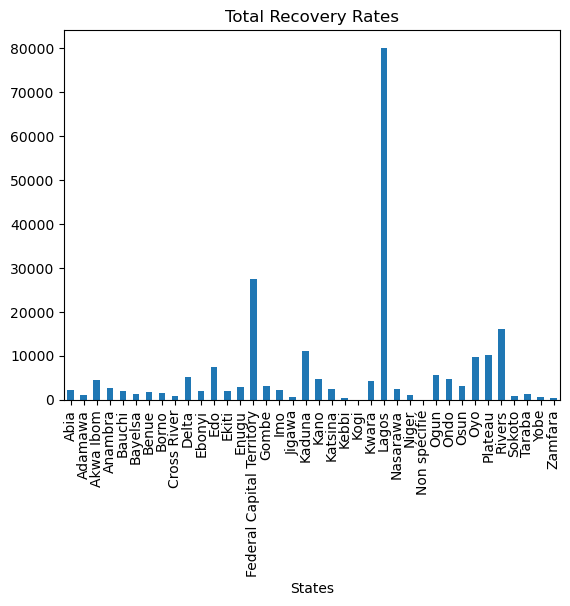

In [13]:
Top_Recovery.plot(kind = 'bar', title = 'Total Recovery Rates')
plt.xlabel = 'States'
plt.ylabel = 'Recovery Rates' 

3. What year has the highest number of contaminates?

In [14]:
Peak_Con = df.groupby('Year')['Contaminates'].sum().reset_index()
Peak_Con.sort_values( by = 'Contaminates', ascending=False).head(1)

,Year,Contaminates
1,2021,154841.0


<Axes: xlabel='Year', ylabel='Contaminates'>

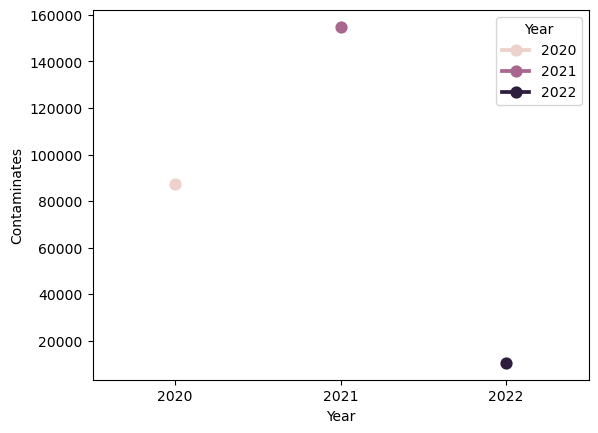

In [15]:

sns.pointplot(x = 'Year', y = 'Contaminates', hue = 'Year', data = Peak_Con,)

4. What is the total number of deaths and recovery

In [16]:
Death= df['Death'].sum() 
Recover = df['Recover'].sum()
print(f'The total number of deaths recorded is {Death}, While {Recover} recovered.')

The total number of deaths recorded is 3135.0, While 229019.0 recovered.


5. The relationship between contamination and recovery.

In [28]:
relationship = df['Contaminates'].corr(df['Recover'])
print(f'Contaminants has little impact on recovery, it is {relationship} which is weak.')

Contaminants has little impact on recovery, it is 0.17159686381316314 which is weak.


In [29]:
df

,ID,DATE,States,Contaminates,Death,Recover,Year,Month,Day
0,1,2020-02-27,Abia,0.0,0.0,0.0,2020,February,Thursday
1,2,2020-02-27,Adamawa,0.0,0.0,0.0,2020,February,Thursday
2,3,2020-02-27,Akwa Ibom,0.0,0.0,0.0,2020,February,Thursday
3,4,2020-02-27,Anambra,0.0,0.0,0.0,2020,February,Thursday
4,5,2020-02-27,Bauchi,0.0,0.0,0.0,2020,February,Thursday
...,...,...,...,...,...,...,...,...,...
26861,26862,2022-02-02,Sokoto,0.0,0.0,0.0,2022,February,Wednesday
26862,26863,2022-02-02,Taraba,0.0,0.0,0.0,2022,February,Wednesday
26863,26864,2022-02-02,Yobe,0.0,0.0,0.0,2022,February,Wednesday
26864,26865,2022-02-02,Zamfara,0.0,0.0,0.0,2022,February,Wednesday


6. What is the average death recorded in 2020 and 2021?

In [32]:
df['Year'] = df['DATE'].dt.year

In [39]:
just_date = df[
    (df['DATE'].dt.year == 2020) |
    (df['DATE'].dt.year == 2021)
]
Average = just_date.groupby('Year')['Death'].mean()
Average

Year
2020    0.113678
2021    0.125595
Name: Death, dtype: float64